### Analysis Double Gyre sims

In [2]:
import xarray as xr
import xrft
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%reload_ext autoreload
%autoreload 2
    
from sim_analysis_modules import create_leaf, analyze_sims

In [23]:
scales = ['20','40']
#Cvals = ['0','0.1','0.2','0.25','0.3','0.4','0.5','1']
Cvals = ['0','0.1','0.2','0.3','0.4','0.5','1']
Cvals_array = np.array(Cvals, dtype=float)

In [5]:
dir_5km = '/scratch/db194/mom6/tests_double_gyre/generate_data/double_gyre_5km/'
ds_HR = analyze_sims(dir_5km)

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


problem in cont file.


In [14]:
ds_ANN_dic = {}

dir = '/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/'

for L in scales:
    for c in Cvals:
        if c == '0':
            dir_case = '/scratch/db194/mom6/tests_double_gyre/double_gyre_'+L+'km/'
        elif c=='1':
            dir_case = dir+L+'km/double_gyre_'+L+'km_ANN_FGR5/'
        else:
            intp = str(int(float(c)*10))
            dir_case = dir+L+'km/double_gyre_'+L+'km_ANN_FGR5_Cperp_p'+intp+'_Cpara_p'+intp+'/'
        print(dir_case)
        create_leaf(ds_ANN_dic, [L, c], analyze_sims(dir_case))
        

/scratch/db194/mom6/tests_double_gyre/double_gyre_20km/
problem in cont file.
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5_Cperp_p1_Cpara_p1/
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5_Cperp_p2_Cpara_p2/
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5_Cperp_p2_Cpara_p2/
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5_Cperp_p3_Cpara_p3/
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5_Cperp_p4_Cpara_p4/
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5_Cperp_p5_Cpara_p5/
/scratch/db194/mom6/tests_double_gyre/tests_local_para_perp_arch_18mar_2024/20km/double_gyre_20km_ANN_FGR5/
/scratch/db194/mom6/tests_double_gyre/double_gyre_40km/
pr

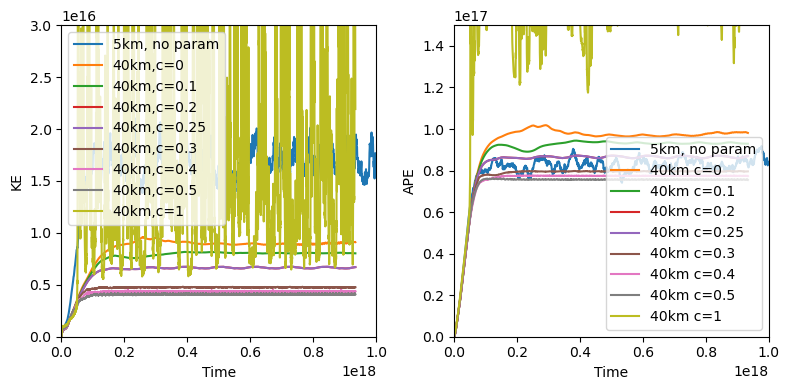

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(121)
ds_HR.OS.KE.sum('Layer').plot(label='5km, no param')


plt.subplot(122)
ds_HR.OS.APE.sum('Interface').plot(label='5km, no param')


for L in ['40']:
    for c in Cvals: 
        plt.subplot(121)
        ds_ANN_dic[L][c].OS.KE.sum('Layer').plot(label='40km,c='+c)
        plt.subplot(122)
        ds_ANN_dic[L][c].OS.APE.sum('Interface').plot(label='40km c='+c)

plt.subplot(121)
plt.legend()
plt.ylim([0, 3e16])
plt.xlim([0, 1e18])

plt.subplot(122)
plt.ylim([0, 1.5e17])
plt.xlim([0, 1e18])
plt.legend()

plt.tight_layout()

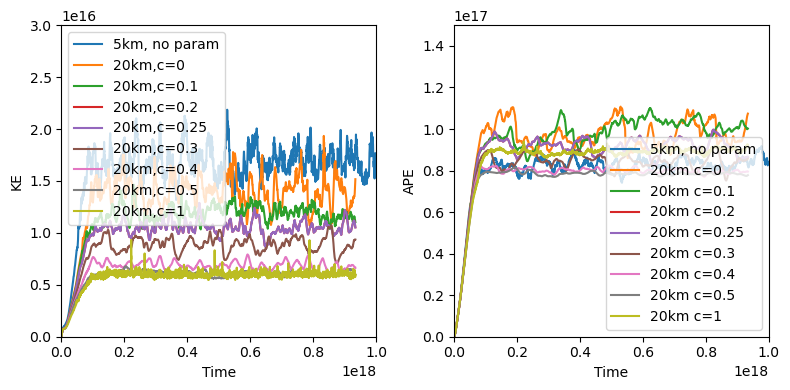

In [16]:
plt.figure(figsize=(8,4))
plt.subplot(121)
ds_HR.OS.KE.sum('Layer').plot(label='5km, no param')


plt.subplot(122)
ds_HR.OS.APE.sum('Interface').plot(label='5km, no param')


for L in ['20']:
    for c in Cvals: 
        plt.subplot(121)
        ds_ANN_dic[L][c].OS.KE.sum('Layer').plot(label='20km,c='+c)
        plt.subplot(122)
        ds_ANN_dic[L][c].OS.APE.sum('Interface').plot(label='20km c='+c)

plt.subplot(121)
plt.legend()
plt.ylim([0, 3e16])
plt.xlim([0, 1e18])

plt.subplot(122)
plt.ylim([0, 1.5e17])
plt.xlim([0, 1e18])
plt.legend()

plt.tight_layout()

### Time averages of APE, KE

In [38]:
APE_HR = ds_HR.OS.APE.sum('Interface').isel(Time=slice(5000, None)).mean('Time').values
KE_HR = ds_HR.OS.KE.sum('Layer').isel(Time=slice(5000, None)).mean('Time').values

In [39]:
APE_av = np.zeros( (len(scales), len(Cvals)) )
KE_av = np.zeros( (len(scales), len(Cvals)) )

for i, L in enumerate(['20','40']):
    for j, c in enumerate(Cvals): 
        #print(j)
        
        KE_av[i,j] = ds_ANN_dic[L][c].OS.KE.sum('Layer').isel(Time=slice(5000, None)).mean('Time').values
        
        APE_av[i,j] = ds_ANN_dic[L][c].OS.APE.sum('Interface').isel(Time=slice(5000, None)).mean('Time').values


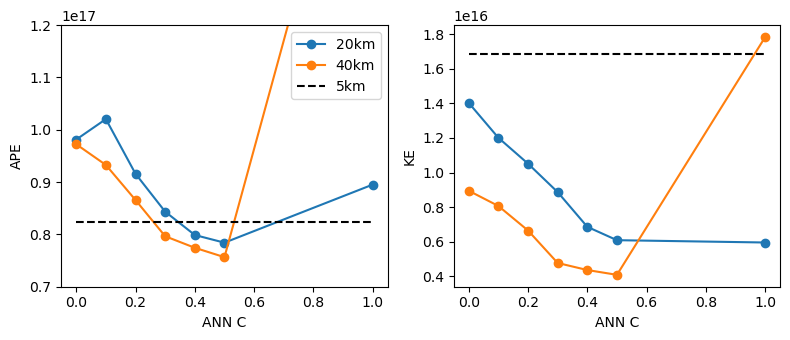

In [49]:
plt.figure(figsize=(8, 3.5))

plt.subplot(121)
plt.plot(Cvals_array, APE_av[0,:], label='20km', marker='o')
plt.plot(Cvals_array, APE_av[1,:], label='40km', marker='o')
plt.hlines(APE_HR, 0,1, label='5km', linestyles='dashed',colors='k')
plt.xlabel('ANN C')
plt.ylabel('APE')
plt.legend()
plt.ylim(0.7e17, 1.2e17)

plt.subplot(122)
plt.plot(Cvals_array, KE_av[0,:], label='20km', marker='o')
plt.plot(Cvals_array, KE_av[1,:], label='40km', marker='o')
plt.hlines(KE_HR, 0,1, linestyles='dashed',colors='k')
plt.xlabel('ANN C')
plt.ylabel('KE')
#plt.legend()

plt.tight_layout()

### Snapshots:

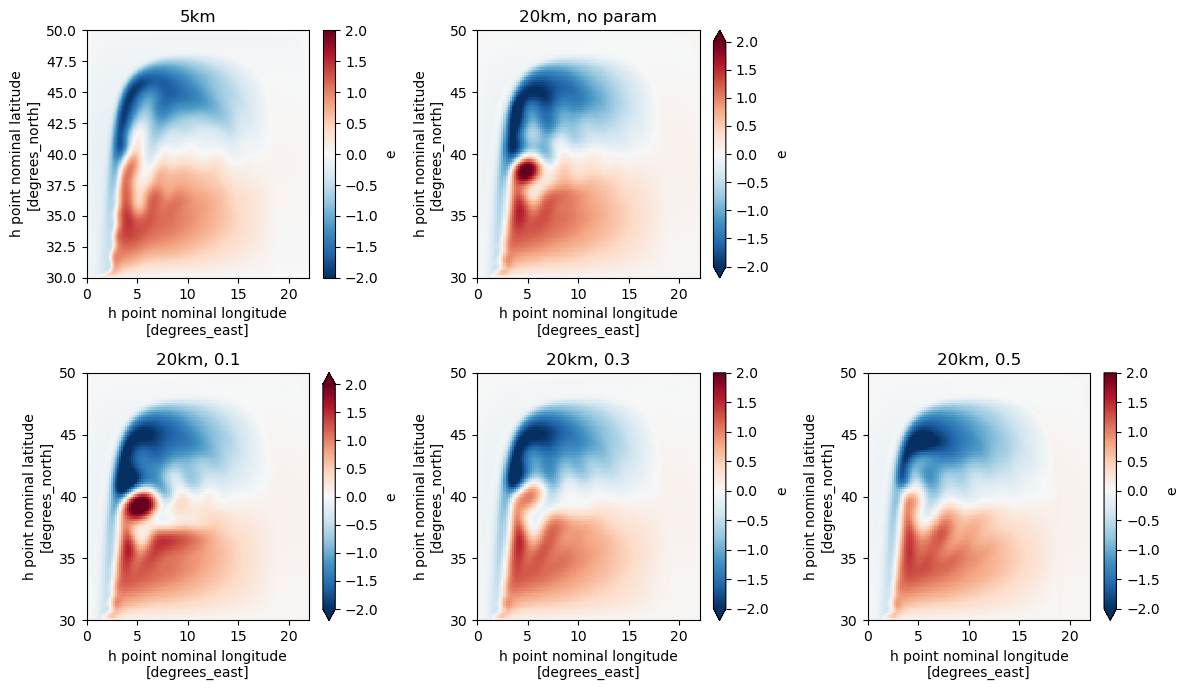

In [17]:
plt.figure(figsize=(12, 7))

plt.subplot(231)
ds_HR.prog.e.isel(zi=0).sel(Time=slice(3600, 10800)).mean('Time').plot(vmin=-2)
plt.title('5km')

plt.subplot(232)
ds_ANN_dic['20']['0'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('20km, no param')

plt.subplot(234)
ds_ANN_dic['20']['0.1'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('20km, 0.1')

plt.subplot(235)
ds_ANN_dic['20']['0.3'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('20km, 0.3')

plt.subplot(236)
ds_ANN_dic['20']['0.5'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('20km, 0.5')

plt.tight_layout()

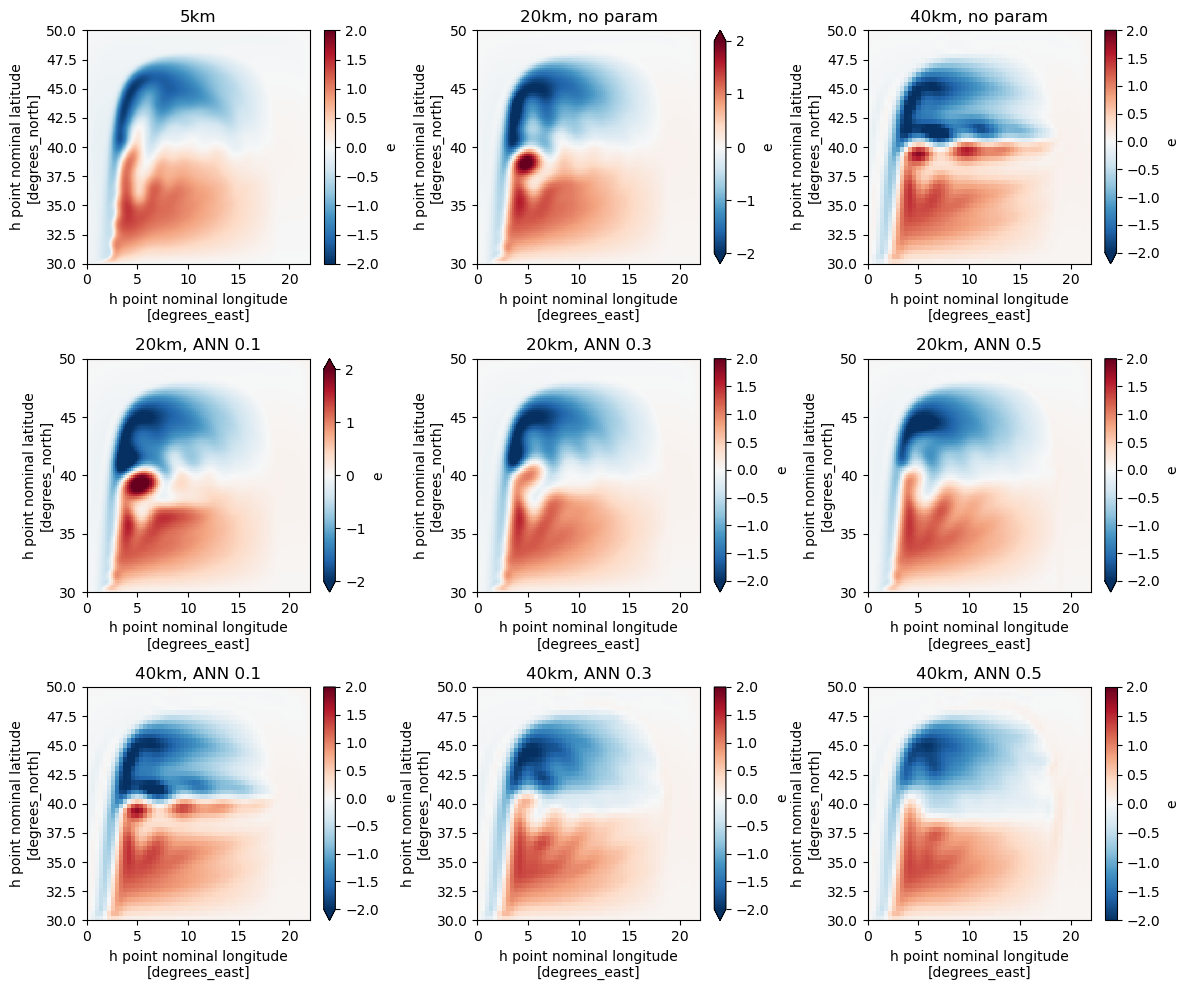

In [51]:
plt.figure(figsize=(12, 10))

plt.subplot(331)
ds_HR.prog.e.isel(zi=0).sel(Time=slice(3600, 10800)).mean('Time').plot(vmin=-2)
plt.title('5km')

plt.subplot(332)
ds_ANN_dic['20']['0'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('20km, no param')

plt.subplot(333)
ds_ANN_dic['40']['0'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('40km, no param')

plt.subplot(334)
ds_ANN_dic['20']['0.1'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('20km, ANN 0.1')

plt.subplot(335)
ds_ANN_dic['20']['0.3'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('20km, ANN 0.3')

plt.subplot(336)
ds_ANN_dic['20']['0.5'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('20km, ANN 0.5')

plt.subplot(337)
ds_ANN_dic['40']['0.1'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('40km, ANN 0.1')

plt.subplot(338)
ds_ANN_dic['40']['0.3'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('40km, ANN 0.3')

plt.subplot(339)
ds_ANN_dic['40']['0.5'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('40km, ANN 0.5')

plt.tight_layout()

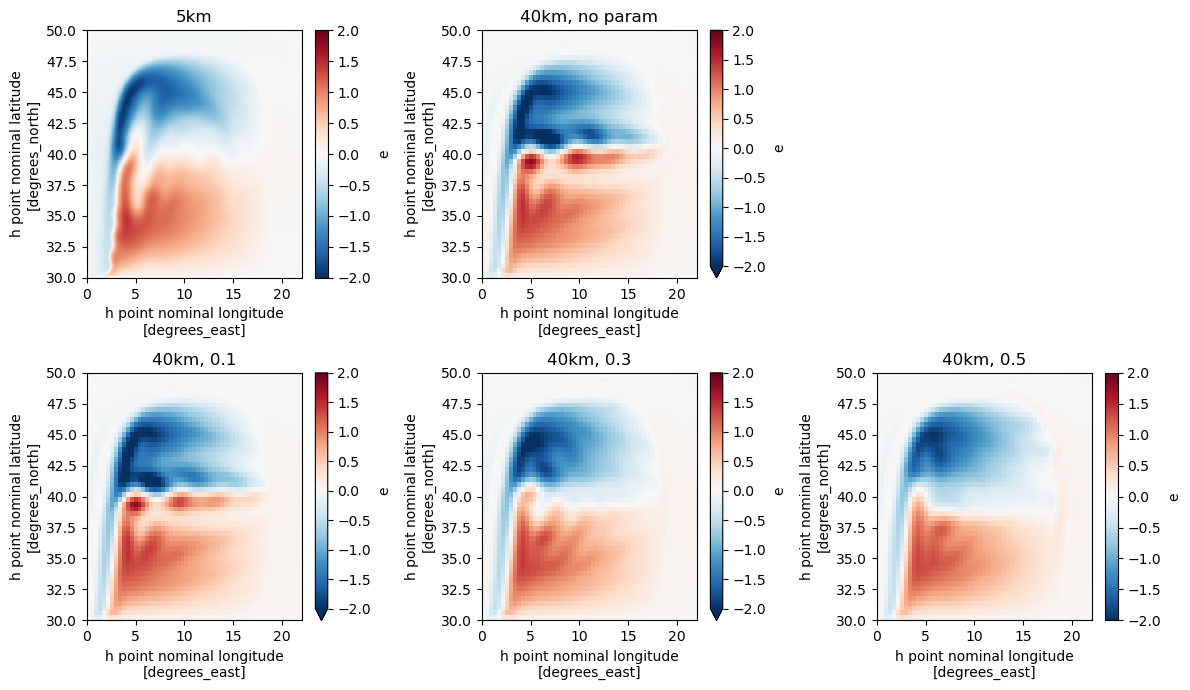

In [18]:
plt.figure(figsize=(12, 7))

plt.subplot(231)
ds_HR.prog.e.isel(zi=0).sel(Time=slice(3600, 10800)).mean('Time').plot(vmin=-2)
plt.title('5km')

plt.subplot(232)
ds_ANN_dic['40']['0'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('40km, no param')

plt.subplot(234)
ds_ANN_dic['40']['0.1'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('40km, 0.1')

plt.subplot(235)
ds_ANN_dic['40']['0.3'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('40km, 0.3')

plt.subplot(236)
ds_ANN_dic['40']['0.5'].prog.e.isel(zi=0).sel(Time=slice(3600, 10800,2)).mean('Time').plot(vmin=-2)
plt.title('40km, 0.5')

plt.tight_layout()